In [117]:
import numpy as np
import os
import subprocess
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
def unit_gaussian(x,mu,sigma):
    inv_cov = np.linalg.inv(sigma)
    D = mu.shape[0]
    exponent = np.exp((-0.5)*np.dot(np.dot((x - mu),inv_cov),(x - mu).T))
    z = 1/(((2*np.pi)**(D/2))*(np.linalg.det(sigma)**0.5))
    return z*exponent

def calculate_likelihood(N,K,data,mu_k,cov_k,pi_k):
    log_likelihood = 0
    for n in range(N):
        temp = 0
        for k in range(K):
            temp += pi_k[k] * (unit_gaussian(data[n],mu_k[k,:],cov_k[k,:,:]))
        log_likelihood += np.log(temp)
    return log_likelihood

def testing_model(MAP_ADAPTED_MODEL,test_array,index1,index2,D = 13,K = 32):
    mu_map,cov_map,pi_map = MAP_ADAPTED_MODEL["mean"],MAP_ADAPTED_MODEL["cov"],MAP_ADAPTED_MODEL["pi"]
    if len(test_array[index1:index2]) == 1500:
        return calculate_likelihood(1500,K,np.array(test_array[index1:index2]),mu_map,cov_map,pi_map)
    else:
        print("not enough data points")
        
def load_csv_file(file_path):
    array = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file)
        for e in csv_reader:
            array.append(e)
    return np.array(array,dtype = np.float64),len(array)

def load_map_model(map_file_path):
    return np.load(map_file_path).item()

def check_name(list_of_strings,file_name_string):
    for e in list_of_strings:
        if e in file_name_string:
            return True
    return False

In [3]:
ROOT_TESTING_FOLDER = "/Users/siva/Documents/speaker_recognition/DHI_audio_files/converted_16k_voice_samples_with_mfcc"
ROOT_MODELS_FOLDER = "/Users/siva/Documents/speaker_recognition/numpy_files/new_models_for_results"
NO_OF_DATAPOINTS = 1500

In [4]:
all_test_files = []
for root,dirs,files in os.walk(ROOT_TESTING_FOLDER):
    if files != []:
        for file in files:
            if ".csv" in file:
                all_test_files.append(root+"/"+file)

In [5]:
all_models = []
for root,dirs,files in os.walk(ROOT_MODELS_FOLDER):
    if files != []:
        for file in files:
            all_models.append(root+"/"+file)

In [6]:
testing_results = {"model":[],"testing_file":[],"index1":[],"index2":[],"likelihood":[]}
for each_model in all_models:
    map_model = load_map_model(each_model)
    print("*****************************")
    print("TESTING MODEL:",each_model)
    for each_test_file in all_test_files:
        test_file,len_ = load_csv_file(each_test_file)
        no_of_splits = len_//NO_OF_DATAPOINTS
        for i in range(0,no_of_splits):
            likelihood = testing_model(map_model,test_file,i*NO_OF_DATAPOINTS,(i+1)*NO_OF_DATAPOINTS)
            print("testing file:",each_test_file.split("/")[-1],"index {0}-{1}".format(i*NO_OF_DATAPOINTS,(i+1)*NO_OF_DATAPOINTS),\
                 "likelihood:",likelihood)
            testing_results["model"].append(each_model)
            testing_results["testing_file"].append(each_test_file)
            testing_results["index1"].append(i*NO_OF_DATAPOINTS)
            testing_results["index2"].append((i+1)*NO_OF_DATAPOINTS)
            testing_results["likelihood"].append(likelihood)

*****************************
TESTING MODEL: /Users/siva/Documents/speaker_recognition/numpy_files/new_models_for_results/lin_new_10000.npy
testing file: Jourdon_training_baseline_close.csv index 0-1500 likelihood: [-129329.2563718]
testing file: Jourdon_training_baseline_close.csv index 1500-3000 likelihood: [-135378.86811802]
testing file: Jourdon_training_baseline_close.csv index 3000-4500 likelihood: [-133352.17381548]
testing file: Jourdon_training_baseline_close.csv index 4500-6000 likelihood: [-135945.50166592]
testing file: Jourdon_training_baseline_close.csv index 6000-7500 likelihood: [-142442.74105524]
testing file: Jourdon_training_baseline_close.csv index 7500-9000 likelihood: [-151997.41810179]
testing file: Jourdon_training_baseline_close.csv index 9000-10500 likelihood: [-151447.01597465]
testing file: Jourdon_training_baseline_close.csv index 10500-12000 likelihood: [-151719.85946069]
testing file: rapid_speech_jourdan.csv index 0-1500 likelihood: [-131274.23715224]
te

testing file: Samarth_slow.csv index 0-1500 likelihood: [-132574.99455214]
testing file: Samarth_slow.csv index 1500-3000 likelihood: [-131879.27556795]
testing file: Samarth_slow.csv index 3000-4500 likelihood: [-130373.77125809]
testing file: Samarth_slow.csv index 4500-6000 likelihood: [-130993.78611114]
testing file: Samarth_slow.csv index 6000-7500 likelihood: [-129594.12619138]
testing file: Samarth_soft.csv index 0-1500 likelihood: [-130616.59717912]
testing file: Samarth_soft.csv index 1500-3000 likelihood: [-130462.06616392]
testing file: Samarth_soft.csv index 3000-4500 likelihood: [-129582.11215304]
testing file: Samarth_soft.csv index 4500-6000 likelihood: [-129439.0160398]
testing file: Samarth_rapid.csv index 0-1500 likelihood: [-134678.31474404]
testing file: Samarth_rapid.csv index 1500-3000 likelihood: [-136440.85637217]
testing file: Samarth_rapid.csv index 3000-4500 likelihood: [-134503.91912748]
testing file: Samarth_distance.csv index 0-1500 likelihood: [-127095.07

testing file: Close_speech_(Kara).csv index 0-1500 likelihood: [-141330.950432]
testing file: Close_speech_(Kara).csv index 1500-3000 likelihood: [-147326.11046992]
testing file: Close_speech_(Kara).csv index 3000-4500 likelihood: [-145676.91393768]
testing file: Slow_speech_(Kara).csv index 0-1500 likelihood: [-122896.75104654]
testing file: Slow_speech_(Kara).csv index 1500-3000 likelihood: [-122761.44267291]
testing file: Slow_speech_(Kara).csv index 3000-4500 likelihood: [-124380.29446873]
testing file: Slow_speech_(Kara).csv index 4500-6000 likelihood: [-124995.78981026]
testing file: Slow_speech_(Kara).csv index 6000-7500 likelihood: [-122505.57967736]
testing file: Slow_speech_(Kara).csv index 7500-9000 likelihood: [-126603.00269709]
testing file: rapid_LB.csv index 0-1500 likelihood: [-73172.10325706]
testing file: rapid_LB.csv index 1500-3000 likelihood: [-73281.35396522]
testing file: low_pitch_LB.csv index 0-1500 likelihood: [-76154.66776181]
testing file: low_pitch_LB.csv i

testing file: Crying_Mariah.csv index 7500-9000 likelihood: [-87257.53362443]
testing file: Soft_AG_Mar_01,_196842.csv index 0-1500 likelihood: [-75622.29984451]
testing file: Soft_AG_Mar_01,_196842.csv index 1500-3000 likelihood: [-76403.04588146]
testing file: Soft_AG_Mar_01,_196842.csv index 3000-4500 likelihood: [-75233.56401186]
testing file: Arti_training_baseline_close.csv index 0-1500 likelihood: [-77833.37013911]
testing file: Arti_training_baseline_close.csv index 1500-3000 likelihood: [-79009.85727976]
testing file: Arti_training_baseline_close.csv index 3000-4500 likelihood: [-78561.04746686]
testing file: Arti_training_baseline_close.csv index 4500-6000 likelihood: [-76821.91086112]
testing file: Arti_training_baseline_close.csv index 6000-7500 likelihood: [-76806.84152733]
testing file: Arti_training_baseline_close.csv index 7500-9000 likelihood: [-77195.88774685]
testing file: Arti_training_baseline_close.csv index 9000-10500 likelihood: [-77392.29861861]
testing file: d

testing file: Cindy_training_baseline_close.csv index 6000-7500 likelihood: [-78017.07304144]
testing file: Cindy_training_baseline_close.csv index 7500-9000 likelihood: [-77356.51787068]
testing file: Cindy_training_baseline_close.csv index 9000-10500 likelihood: [-77501.43977723]
testing file: Cindy_training_baseline_close.csv index 10500-12000 likelihood: [-77232.63422522]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Close_Speech_(Cindy).csv index 0-1500 likelihood: [-77977.38087387]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Close_Speech_(Cindy).csv index 1500-3000 likelihood: [-77485.77781286]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Close_Speech_(Cindy).csv index 3000-4500 likelihood: [-76815.38793081]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Close_Speech_(Cindy).csv index 4500-6000 likelihood: [-78165.38346886]
testing file: Baseline_(Cindy).csv index 0-1500 likelihood: [-78992.59556471]
testing file: Baseline_(Cindy).csv

testing file: EW_2_min_sample_1.csv index 10500-12000 likelihood: [-80026.58960808]
testing file: EW_2_min_sample_2.csv index 0-1500 likelihood: [-80535.77631724]
testing file: EW_2_min_sample_2.csv index 1500-3000 likelihood: [-80393.5105361]
testing file: EW_2_min_sample_2.csv index 3000-4500 likelihood: [-80797.60448124]
testing file: EW_2_min_sample_2.csv index 4500-6000 likelihood: [-79154.40604822]
testing file: EW_2_min_sample_2.csv index 6000-7500 likelihood: [-79880.09952329]
testing file: EW_2_min_sample_2.csv index 7500-9000 likelihood: [-78738.00721813]
testing file: EW_2_min_sample_2.csv index 9000-10500 likelihood: [-79013.50099884]
testing file: EW_2_min_sample_2.csv index 10500-12000 likelihood: [-79419.48780228]
testing file: EW_2_min_sample_2.csv index 12000-13500 likelihood: [-81189.33766217]
testing file: Rapid_speech_(Kara).csv index 0-1500 likelihood: [-140366.05603716]
testing file: Rapid_speech_(Kara).csv index 1500-3000 likelihood: [-145677.46662608]
testing fi

testing file: CloseSpeech_Mariah.csv index 4500-6000 likelihood: [-75286.74616795]
testing file: LowPitch_Vocalfry_Mariah.csv index 0-1500 likelihood: [-72845.76938129]
testing file: LowPitch_Vocalfry_Mariah.csv index 1500-3000 likelihood: [-72366.01139808]
testing file: LowPitch_Vocalfry_Mariah.csv index 3000-4500 likelihood: [-72583.43902696]
testing file: LowPitch_Vocalfry_Mariah.csv index 4500-6000 likelihood: [-72730.47768635]
testing file: DistanceSpeech_Mariah.csv index 0-1500 likelihood: [-76078.24624153]
testing file: DistanceSpeech_Mariah.csv index 1500-3000 likelihood: [-78251.7982509]
testing file: DistanceSpeech_Mariah.csv index 3000-4500 likelihood: [-77389.47166011]
testing file: DistanceSpeech_Mariah.csv index 4500-6000 likelihood: [-77848.45359964]
testing file: Baseline_Mariah.csv index 0-1500 likelihood: [-71307.23437338]
testing file: Baseline_Mariah.csv index 1500-3000 likelihood: [-71245.97646555]
testing file: Baseline_Mariah.csv index 3000-4500 likelihood: [-714

testing file: close_speech_jourdan.csv index 4500-6000 likelihood: [-159431.43951545]
testing file: slow_speech_jourdan.csv index 0-1500 likelihood: [-133954.43546898]
testing file: slow_speech_jourdan.csv index 1500-3000 likelihood: [-133387.38451956]
testing file: slow_speech_jourdan.csv index 3000-4500 likelihood: [-136280.90076019]
testing file: slow_speech_jourdan.csv index 4500-6000 likelihood: [-132770.9940064]
testing file: slow_speech_jourdan.csv index 6000-7500 likelihood: [-132378.41692875]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Distant_Speech_(Cindy).csv index 0-1500 likelihood: [-82108.39958109]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Distant_Speech_(Cindy).csv index 1500-3000 likelihood: [-80638.45884247]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Distant_Speech_(Cindy).csv index 3000-4500 likelihood: [-79728.01712062]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Distant_Speech_(Cindy).csv index 4500-6000 likeli

testing file: Anne_training_baseline_close.csv index 1500-3000 likelihood: [-80345.53697672]
testing file: Anne_training_baseline_close.csv index 3000-4500 likelihood: [-79695.9746531]
testing file: Anne_training_baseline_close.csv index 4500-6000 likelihood: [-77974.46355799]
testing file: Anne_training_baseline_close.csv index 6000-7500 likelihood: [-77894.59338858]
testing file: Anne_training_baseline_close.csv index 7500-9000 likelihood: [-77053.45646545]
testing file: Anne_training_baseline_close.csv index 9000-10500 likelihood: [-77654.54660513]
testing file: Anne_low_pitched.csv index 0-1500 likelihood: [-80239.66924392]
testing file: Anne_low_pitched.csv index 1500-3000 likelihood: [-79317.50245814]
testing file: Anne_low_pitched.csv index 3000-4500 likelihood: [-80656.89931984]
testing file: Anne_low_pitched.csv index 4500-6000 likelihood: [-80834.93816346]
testing file: Anne_loud.csv index 0-1500 likelihood: [-79487.02718321]
testing file: Anne_loud.csv index 1500-3000 likeli

testing file: soft_LB.csv index 3000-4500 likelihood: [-82135.21106187]
testing file: soft_LB.csv index 4500-6000 likelihood: [-82262.99140483]
testing file: slow_LB.csv index 0-1500 likelihood: [-83367.89009568]
testing file: slow_LB.csv index 1500-3000 likelihood: [-81931.28850892]
testing file: slow_LB.csv index 3000-4500 likelihood: [-81107.4017358]
testing file: slow_LB.csv index 4500-6000 likelihood: [-81327.16267408]
testing file: slow_LB.csv index 6000-7500 likelihood: [-81492.72110519]
testing file: Laughing_Mariah.csv index 0-1500 likelihood: [-81012.88659196]
testing file: Laughing_Mariah.csv index 1500-3000 likelihood: [-80617.64010995]
testing file: Laughing_Mariah.csv index 3000-4500 likelihood: [-79740.30840105]
testing file: Laughing_Mariah.csv index 4500-6000 likelihood: [-80612.10871744]
testing file: Laughing_Mariah.csv index 6000-7500 likelihood: [-80467.19174056]
testing file: HighPitch_Mariah.csv index 0-1500 likelihood: [-82027.29338528]
testing file: HighPitch_M

testing file: Jourdon_training_baseline_close.csv index 7500-9000 likelihood: [-81113.33301465]
testing file: Jourdon_training_baseline_close.csv index 9000-10500 likelihood: [-81686.41508985]
testing file: Jourdon_training_baseline_close.csv index 10500-12000 likelihood: [-81007.91778032]
testing file: rapid_speech_jourdan.csv index 0-1500 likelihood: [-80392.36606936]
testing file: rapid_speech_jourdan.csv index 1500-3000 likelihood: [-82073.94315647]
testing file: rapid_speech_jourdan.csv index 3000-4500 likelihood: [-81737.54829932]
testing file: distant_speech_jourdan.csv index 0-1500 likelihood: [-79977.34129932]
testing file: distant_speech_jourdan.csv index 1500-3000 likelihood: [-80469.28585549]
testing file: distant_speech_jourdan.csv index 3000-4500 likelihood: [-80642.92102913]
testing file: distant_speech_jourdan.csv index 4500-6000 likelihood: [-81129.38854516]
testing file: soft_speech_jourdan.csv index 0-1500 likelihood: [-83266.74874463]
testing file: soft_speech_jourd

testing file: Samarth_rapid.csv index 0-1500 likelihood: [-77829.99618444]
testing file: Samarth_rapid.csv index 1500-3000 likelihood: [-77634.14755762]
testing file: Samarth_rapid.csv index 3000-4500 likelihood: [-77581.3897465]
testing file: Samarth_distance.csv index 0-1500 likelihood: [-77211.31885707]
testing file: Samarth_distance.csv index 1500-3000 likelihood: [-77585.97003555]
testing file: Samarth_distance.csv index 3000-4500 likelihood: [-77038.0964707]
testing file: Samarth_distance.csv index 4500-6000 likelihood: [-76823.36856262]
testing file: Anne_crying.csv index 0-1500 likelihood: [-78291.26713529]
testing file: Anne_crying.csv index 1500-3000 likelihood: [-78607.8446964]
testing file: Anne_crying.csv index 3000-4500 likelihood: [-78207.52178391]
testing file: Anne_crying.csv index 4500-6000 likelihood: [-79098.21355397]
testing file: Anne_distant_.csv index 0-1500 likelihood: [-78590.45398012]
testing file: Anne_distant_.csv index 1500-3000 likelihood: [-78440.6462670

testing file: rapid_LB.csv index 0-1500 likelihood: [-80500.5540332]
testing file: rapid_LB.csv index 1500-3000 likelihood: [-77449.13481685]
testing file: low_pitch_LB.csv index 0-1500 likelihood: [-81484.46913706]
testing file: low_pitch_LB.csv index 1500-3000 likelihood: [-79725.28505993]
testing file: low_pitch_LB.csv index 3000-4500 likelihood: [-78776.29306891]
testing file: loud_LB.csv index 0-1500 likelihood: [-88928.71401508]
testing file: loud_LB.csv index 1500-3000 likelihood: [-90090.03914458]
testing file: loud_LB.csv index 3000-4500 likelihood: [-90343.0330274]
testing file: laughing_LB.csv index 0-1500 likelihood: [-87662.25345188]
testing file: laughing_LB.csv index 1500-3000 likelihood: [-86871.35601749]
testing file: laughing_LB.csv index 3000-4500 likelihood: [-86877.03461853]
testing file: close_LB.csv index 0-1500 likelihood: [-84042.36904737]
testing file: close_LB.csv index 1500-3000 likelihood: [-83790.03366806]
testing file: close_LB.csv index 3000-4500 likelih

testing file: Arti_training_baseline_close.csv index 7500-9000 likelihood: [-87233.10870696]
testing file: Arti_training_baseline_close.csv index 9000-10500 likelihood: [-87126.71440377]
testing file: distant_AG.csv index 0-1500 likelihood: [-85791.20316188]
testing file: distant_AG.csv index 1500-3000 likelihood: [-81487.74857003]
testing file: distant_AG.csv index 3000-4500 likelihood: [-80530.92159942]
testing file: close_AG.csv index 0-1500 likelihood: [-83825.40988213]
testing file: close_AG.csv index 1500-3000 likelihood: [-85807.99346956]
testing file: close_AG.csv index 3000-4500 likelihood: [-87851.74627464]
testing file: Loud_AG_Mar_01,_845111.csv index 0-1500 likelihood: [-91970.10825319]
testing file: Loud_AG_Mar_01,_845111.csv index 1500-3000 likelihood: [-89462.82547892]
testing file: Loud_AG_Mar_01,_845111.csv index 3000-4500 likelihood: [-90320.77303824]
testing file: slow_AG_Mar_01,_621548.csv index 0-1500 likelihood: [-81226.56622661]
testing file: slow_AG_Mar_01,_621

testing file: Baseline_(Cindy).csv index 0-1500 likelihood: [-72342.5417958]
testing file: Baseline_(Cindy).csv index 1500-3000 likelihood: [-70170.17651933]
testing file: Baseline_(Cindy).csv index 3000-4500 likelihood: [-69835.63371372]
testing file: Baseline_(Cindy).csv index 4500-6000 likelihood: [-69846.46369877]
testing file: Samarth_loud.csv index 0-1500 likelihood: [-155629.7842262]
testing file: Samarth_loud.csv index 1500-3000 likelihood: [-155318.10185554]
testing file: Samarth_loud.csv index 3000-4500 likelihood: [-153373.66958059]
testing file: Samarth_loud.csv index 4500-6000 likelihood: [-156176.40960476]
testing file: Samarth_close.csv index 0-1500 likelihood: [-161147.45705247]
testing file: Samarth_close.csv index 1500-3000 likelihood: [-158480.82359775]
testing file: Samarth_close.csv index 3000-4500 likelihood: [-157043.04369886]
testing file: Samarth_close.csv index 4500-6000 likelihood: [-158729.37256118]
testing file: Samarth_training_soft_close.csv index 0-1500 

testing file: Rapid_speech_(Kara).csv index 1500-3000 likelihood: [-160950.17587172]
testing file: Rapid_speech_(Kara).csv index 3000-4500 likelihood: [-158178.16484019]
testing file: Soft_speech_(Kara).csv index 0-1500 likelihood: [-138836.40449272]
testing file: Soft_speech_(Kara).csv index 1500-3000 likelihood: [-140706.88759971]
testing file: Soft_speech_(Kara).csv index 3000-4500 likelihood: [-137169.90633216]
testing file: Soft_speech_(Kara).csv index 4500-6000 likelihood: [-142161.34769261]
testing file: Distant_speech_(Kara).csv index 0-1500 likelihood: [-144827.43197532]
testing file: Distant_speech_(Kara).csv index 1500-3000 likelihood: [-147970.93570233]
testing file: Distant_speech_(Kara).csv index 3000-4500 likelihood: [-147206.47841924]
testing file: Baseline_(Kara).csv index 0-1500 likelihood: [-153364.86670485]
testing file: Baseline_(Kara).csv index 1500-3000 likelihood: [-160162.49242254]
testing file: Baseline_(Kara).csv index 3000-4500 likelihood: [-162136.80836911]

testing file: Baseline_Mariah.csv index 3000-4500 likelihood: [-78389.19992589]
testing file: Baseline_Mariah.csv index 4500-6000 likelihood: [-76943.37806361]
testing file: Loud_Mariah.csv index 0-1500 likelihood: [-82562.21034551]
testing file: Loud_Mariah.csv index 1500-3000 likelihood: [-84204.59708515]
testing file: Loud_Mariah.csv index 3000-4500 likelihood: [-84257.68408927]
testing file: Loud_Mariah.csv index 4500-6000 likelihood: [-83148.09907634]
testing file: Mariah_training_baseline_close.csv index 0-1500 likelihood: [-77291.21021778]
testing file: Mariah_training_baseline_close.csv index 1500-3000 likelihood: [-77521.12623447]
testing file: Mariah_training_baseline_close.csv index 3000-4500 likelihood: [-78389.19992601]
testing file: Mariah_training_baseline_close.csv index 4500-6000 likelihood: [-76943.37806355]
testing file: Mariah_training_baseline_close.csv index 6000-7500 likelihood: [-79061.50124814]
testing file: Mariah_training_baseline_close.csv index 7500-9000 li

testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Rapid_(Cindy).csv index 0-1500 likelihood: [-80086.49589962]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Rapid_(Cindy).csv index 1500-3000 likelihood: [-79273.61617965]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Rapid_(Cindy).csv index 3000-4500 likelihood: [-80602.61678441]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 0-1500 likelihood: [-81779.64667327]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 1500-3000 likelihood: [-79790.42613673]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 3000-4500 likelihood: [-80903.73111476]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 4500-6000 likelihood: [-80472.63667446]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 6000-7500 likelihood: [-80851.3989146]
testing file: AMP_Lab_Voice_Characteris

testing file: Anne_rapid.csv index 0-1500 likelihood: [-77625.54112424]
testing file: Anne_rapid.csv index 1500-3000 likelihood: [-78696.66665957]
testing file: Anne_laughing.csv index 0-1500 likelihood: [-79802.83861459]
testing file: Anne_laughing.csv index 1500-3000 likelihood: [-80664.88600248]
testing file: Anne_laughing.csv index 3000-4500 likelihood: [-81230.29598589]
testing file: EW_angry.csv index 0-1500 likelihood: [-82273.48126626]
testing file: EW_quietly_concerned.csv index 0-1500 likelihood: [-79215.00572068]
testing file: EW_exclamatory.csv index 0-1500 likelihood: [-81878.67136116]
testing file: EW_nervous.csv index 0-1500 likelihood: [-81960.0116307]
testing file: EW_sad.csv index 0-1500 likelihood: [-79632.19856275]
testing file: EW_happy.csv index 0-1500 likelihood: [-84744.687194]
testing file: EW_2_min_sample_1.csv index 0-1500 likelihood: [-81556.24829308]
testing file: EW_2_min_sample_1.csv index 1500-3000 likelihood: [-80577.92288715]
testing file: EW_2_min_sam

testing file: HighPitch_Mariah.csv index 4500-6000 likelihood: [-82234.55651078]
testing file: Rapid_Mariah.csv index 0-1500 likelihood: [-79846.43033194]
testing file: Rapid_Mariah.csv index 1500-3000 likelihood: [-79067.10419487]
testing file: Soft_Mariah.csv index 0-1500 likelihood: [-76716.00610199]
testing file: Soft_Mariah.csv index 1500-3000 likelihood: [-78169.93785769]
testing file: Soft_Mariah.csv index 3000-4500 likelihood: [-76696.89506502]
testing file: Soft_Mariah.csv index 4500-6000 likelihood: [-77411.56108295]
testing file: Slow_Mariah.csv index 0-1500 likelihood: [-78980.77926935]
testing file: Slow_Mariah.csv index 1500-3000 likelihood: [-75355.91414874]
testing file: Slow_Mariah.csv index 3000-4500 likelihood: [-76403.95388184]
testing file: Slow_Mariah.csv index 4500-6000 likelihood: [-76584.35407216]
testing file: Slow_Mariah.csv index 6000-7500 likelihood: [-75712.37150926]
testing file: Slow_Mariah.csv index 7500-9000 likelihood: [-75961.78784793]
testing file: 

testing file: soft_speech_jourdan.csv index 4500-6000 likelihood: [-77745.40283779]
testing file: high_pitched_speech_jourdan.csv index 0-1500 likelihood: [-78987.38540608]
testing file: high_pitched_speech_jourdan.csv index 1500-3000 likelihood: [-79613.8889305]
testing file: high_pitched_speech_jourdan.csv index 3000-4500 likelihood: [-79790.3204532]
testing file: high_pitched_speech_jourdan.csv index 4500-6000 likelihood: [-80117.28926454]
testing file: baseline_jourdan copy.csv index 0-1500 likelihood: [-76628.33007518]
testing file: baseline_jourdan copy.csv index 1500-3000 likelihood: [-78260.97314087]
testing file: baseline_jourdan copy.csv index 3000-4500 likelihood: [-78724.18891116]
testing file: baseline_jourdan copy.csv index 4500-6000 likelihood: [-78455.21994029]
testing file: loud_speech_jourdan.csv index 0-1500 likelihood: [-78544.63470645]
testing file: loud_speech_jourdan.csv index 1500-3000 likelihood: [-81052.76973237]
testing file: loud_speech_jourdan.csv index 300

testing file: Anne_high_pitched.csv index 1500-3000 likelihood: [-83043.04729364]
testing file: Anne_high_pitched.csv index 3000-4500 likelihood: [-82334.76745866]
testing file: Anne_close.csv index 0-1500 likelihood: [-77591.03588224]
testing file: Anne_close.csv index 1500-3000 likelihood: [-77817.90844184]
testing file: Anne_close.csv index 3000-4500 likelihood: [-78090.93697823]
testing file: Anne_soft.csv index 0-1500 likelihood: [-77825.12519614]
testing file: Anne_soft.csv index 1500-3000 likelihood: [-79176.89644561]
testing file: Anne_soft.csv index 3000-4500 likelihood: [-77901.5289533]
testing file: Anne_baseline.csv index 0-1500 likelihood: [-78462.03135816]
testing file: Anne_baseline.csv index 1500-3000 likelihood: [-79520.52710459]
testing file: Anne_baseline.csv index 3000-4500 likelihood: [-78715.553583]
testing file: Anne_slow.csv index 0-1500 likelihood: [-77442.01748402]
testing file: Anne_slow.csv index 1500-3000 likelihood: [-79353.64853668]
testing file: Anne_slo

testing file: distant_LB.csv index 1500-3000 likelihood: [-78538.28195095]
testing file: distant_LB.csv index 3000-4500 likelihood: [-79226.96160428]
testing file: distant_LB.csv index 4500-6000 likelihood: [-79624.71119981]
testing file: baseline_LB.csv index 0-1500 likelihood: [-80805.70387077]
testing file: baseline_LB.csv index 1500-3000 likelihood: [-78226.60859102]
testing file: baseline_LB.csv index 3000-4500 likelihood: [-78340.57966342]
testing file: Lin_training_baseline_close.csv index 0-1500 likelihood: [-80805.70387098]
testing file: Lin_training_baseline_close.csv index 1500-3000 likelihood: [-78226.60859117]
testing file: Lin_training_baseline_close.csv index 3000-4500 likelihood: [-78340.57966349]
testing file: Lin_training_baseline_close.csv index 4500-6000 likelihood: [-79772.13934014]
testing file: Lin_training_baseline_close.csv index 6000-7500 likelihood: [-84810.50726684]
testing file: Lin_training_baseline_close.csv index 7500-9000 likelihood: [-83119.95301258]
t

testing file: slow_AG_Mar_01,_621548.csv index 4500-6000 likelihood: [-85685.0628089]
testing file: slow_AG_Mar_01,_621548.csv index 6000-7500 likelihood: [-86020.15260426]
testing file: Baseline_AG_Mar_01,_689201.csv index 0-1500 likelihood: [-86083.62498422]
testing file: Baseline_AG_Mar_01,_689201.csv index 1500-3000 likelihood: [-84481.17701199]
testing file: Baseline_AG_Mar_01,_689201.csv index 3000-4500 likelihood: [-84869.86591233]
testing file: rapid_AG_Mar_01,_559134.csv index 0-1500 likelihood: [-86982.31996491]
testing file: rapid_AG_Mar_01,_559134.csv index 1500-3000 likelihood: [-85461.81192431]
*****************************
TESTING MODEL: /Users/siva/Documents/speaker_recognition/numpy_files/new_models_for_results/arti_new_10000.npy
testing file: Jourdon_training_baseline_close.csv index 0-1500 likelihood: [-135920.13916628]
testing file: Jourdon_training_baseline_close.csv index 1500-3000 likelihood: [-143330.07238475]
testing file: Jourdon_training_baseline_close.csv in

testing file: Samarth_training_soft_close.csv index 3000-4500 likelihood: [-136462.89380639]
testing file: Samarth_training_soft_close.csv index 4500-6000 likelihood: [-136334.33476553]
testing file: Samarth_training_soft_close.csv index 6000-7500 likelihood: [-146212.59836976]
testing file: Samarth_training_soft_close.csv index 7500-9000 likelihood: [-149305.9641717]
testing file: Samarth_training_soft_close.csv index 9000-10500 likelihood: [-145471.72824689]
testing file: Samarth_training_soft_close.csv index 10500-12000 likelihood: [-148611.62561419]
testing file: Samarth_slow.csv index 0-1500 likelihood: [-137836.54671334]
testing file: Samarth_slow.csv index 1500-3000 likelihood: [-137152.5117958]
testing file: Samarth_slow.csv index 3000-4500 likelihood: [-136390.78773034]
testing file: Samarth_slow.csv index 4500-6000 likelihood: [-137721.57878578]
testing file: Samarth_slow.csv index 6000-7500 likelihood: [-135061.21575776]
testing file: Samarth_soft.csv index 0-1500 likelihood

testing file: Kara_training_baseline_close.csv index 1500-3000 likelihood: [-143092.5520126]
testing file: Kara_training_baseline_close.csv index 3000-4500 likelihood: [-144485.61296421]
testing file: Kara_training_baseline_close.csv index 4500-6000 likelihood: [-139257.47349697]
testing file: Kara_training_baseline_close.csv index 6000-7500 likelihood: [-152672.47529913]
testing file: Kara_training_baseline_close.csv index 7500-9000 likelihood: [-153312.82218326]
testing file: Kara_training_baseline_close.csv index 9000-10500 likelihood: [-152907.81120366]
testing file: Close_speech_(Kara).csv index 0-1500 likelihood: [-146547.98714552]
testing file: Close_speech_(Kara).csv index 1500-3000 likelihood: [-153137.9295707]
testing file: Close_speech_(Kara).csv index 3000-4500 likelihood: [-152295.80240627]
testing file: Slow_speech_(Kara).csv index 0-1500 likelihood: [-128541.18313511]
testing file: Slow_speech_(Kara).csv index 1500-3000 likelihood: [-127784.18281908]
testing file: Slow_s

testing file: Mariah_training_baseline_close.csv index 9000-10500 likelihood: [-86555.3285883]
testing file: Mariah_training_baseline_close.csv index 10500-12000 likelihood: [-86117.2155422]
testing file: Crying_Mariah.csv index 0-1500 likelihood: [-85810.17380633]
testing file: Crying_Mariah.csv index 1500-3000 likelihood: [-88220.2418223]
testing file: Crying_Mariah.csv index 3000-4500 likelihood: [-86417.06394801]
testing file: Crying_Mariah.csv index 4500-6000 likelihood: [-87611.28754145]
testing file: Crying_Mariah.csv index 6000-7500 likelihood: [-87864.53791227]
testing file: Crying_Mariah.csv index 7500-9000 likelihood: [-88044.07711905]
testing file: Soft_AG_Mar_01,_196842.csv index 0-1500 likelihood: [-71906.29437572]
testing file: Soft_AG_Mar_01,_196842.csv index 1500-3000 likelihood: [-72496.48334636]
testing file: Soft_AG_Mar_01,_196842.csv index 3000-4500 likelihood: [-72586.72206874]
testing file: Arti_training_baseline_close.csv index 0-1500 likelihood: [-71414.9946069

testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Slow_(Cindy)_.csv index 7500-9000 likelihood: [-133536.67230501]
testing file: Cindy_training_baseline_close.csv index 0-1500 likelihood: [-78292.74167683]
testing file: Cindy_training_baseline_close.csv index 1500-3000 likelihood: [-76623.56333617]
testing file: Cindy_training_baseline_close.csv index 3000-4500 likelihood: [-75938.10695228]
testing file: Cindy_training_baseline_close.csv index 4500-6000 likelihood: [-76491.02326779]
testing file: Cindy_training_baseline_close.csv index 6000-7500 likelihood: [-77826.39523845]
testing file: Cindy_training_baseline_close.csv index 7500-9000 likelihood: [-77245.37334141]
testing file: Cindy_training_baseline_close.csv index 9000-10500 likelihood: [-76899.92185606]
testing file: Cindy_training_baseline_close.csv index 10500-12000 likelihood: [-76953.9315987]
testing file: AMP_Lab_Voice_Characteristic_Audio_Samples-Close_Speech_(Cindy).csv index 0-1500 likelihood: [-78381.0541572]
tes

testing file: EW_2_min_sample_1.csv index 1500-3000 likelihood: [-80649.19987832]
testing file: EW_2_min_sample_1.csv index 3000-4500 likelihood: [-78518.73732367]
testing file: EW_2_min_sample_1.csv index 4500-6000 likelihood: [-79931.22088625]
testing file: EW_2_min_sample_1.csv index 6000-7500 likelihood: [-78980.47207128]
testing file: EW_2_min_sample_1.csv index 7500-9000 likelihood: [-79042.91307302]
testing file: EW_2_min_sample_1.csv index 9000-10500 likelihood: [-78747.56793844]
testing file: EW_2_min_sample_1.csv index 10500-12000 likelihood: [-79879.22399497]
testing file: EW_2_min_sample_2.csv index 0-1500 likelihood: [-80133.58866574]
testing file: EW_2_min_sample_2.csv index 1500-3000 likelihood: [-80121.09981488]
testing file: EW_2_min_sample_2.csv index 3000-4500 likelihood: [-81042.71287343]
testing file: EW_2_min_sample_2.csv index 4500-6000 likelihood: [-79598.19877141]
testing file: EW_2_min_sample_2.csv index 6000-7500 likelihood: [-80055.46954599]
testing file: EW

testing file: Slow_Mariah.csv index 7500-9000 likelihood: [-74625.939675]
testing file: Slow_Mariah.csv index 9000-10500 likelihood: [-73899.92291916]
testing file: Slow_Mariah.csv index 10500-12000 likelihood: [-74217.90200664]
testing file: CloseSpeech_Mariah.csv index 0-1500 likelihood: [-76703.35366339]
testing file: CloseSpeech_Mariah.csv index 1500-3000 likelihood: [-76736.13302837]
testing file: CloseSpeech_Mariah.csv index 3000-4500 likelihood: [-76851.42832318]
testing file: CloseSpeech_Mariah.csv index 4500-6000 likelihood: [-76901.31634103]
testing file: LowPitch_Vocalfry_Mariah.csv index 0-1500 likelihood: [-75422.29245945]
testing file: LowPitch_Vocalfry_Mariah.csv index 1500-3000 likelihood: [-75026.21420273]
testing file: LowPitch_Vocalfry_Mariah.csv index 3000-4500 likelihood: [-74911.18698838]
testing file: LowPitch_Vocalfry_Mariah.csv index 4500-6000 likelihood: [-74960.04769876]
testing file: DistanceSpeech_Mariah.csv index 0-1500 likelihood: [-78726.47156179]
testin

In [7]:
np.save("DHI_testing_results.npy",testing_results)

In [153]:
def generate_confusion_matrix(results,model_name,file_name_strings,file_name_exceptions):
    positive_likelihood_values = {}
    negative_likelihood_values = {}
    for model,file,likelihood in zip(results["model"],results["testing_file"],\
                                     results["likelihood"]):
        file_ = file.split("/")[-1]
        model_ = model.split("/")[-1]
        if model_ == model_name:
            if check_name(file_name_strings,file_):
                if not check_name(file_name_exceptions,file_):
                    #print(file_)
                    positive_likelihood_values[abs(likelihood[0])] = file_
                #else:
                    #print(file_)
            else:
                negative_likelihood_values[abs(likelihood[0])] = file_
    mean = np.mean(list(positive_likelihood_values.keys()))
    TP = sum(list(positive_likelihood_values.keys())<mean)
    TN = sum(list(negative_likelihood_values.keys())>mean)
    FP = sum(list(negative_likelihood_values.keys())<mean)
    FN = sum(list(positive_likelihood_values.keys())>mean)
    arr = [[TP,FP],[FN,TN]]
    s = [["TP","FP"],["FN","TN"]]
    plt.imshow(arr, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(arr[i][j]))
    print("mean:",mean,"TP:",TP,"TN:",TN,"FP:",FP,"FN:",FN,"Accuracy:",np.sum(np.diag(arr))/np.sum(arr))

mean: 74168.7048373 TP: 13 TN: 282 FP: 0 FN: 11 Accuracy: 0.964052287582


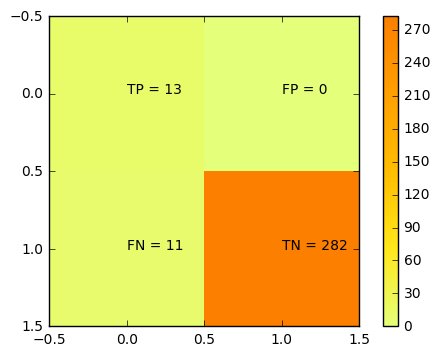

In [154]:
generate_confusion_matrix(testing_results,"lin_new_10000.npy",["LB","Lin"],["training","baseline","close"])

mean: 75031.3006428 TP: 21 TN: 259 FP: 4 FN: 20 Accuracy: 0.921052631579


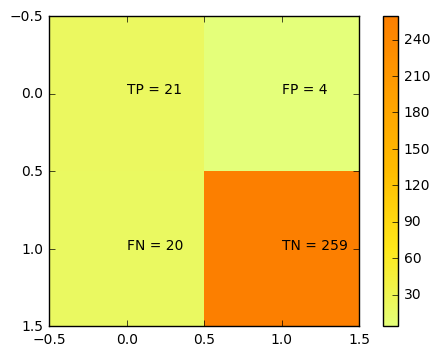

In [155]:
generate_confusion_matrix(testing_results,"mariah_new_10000.npy",["Mariah"],["training","Baseline","Close"])

mean: 74610.5095023 TP: 9 TN: 297 FP: 0 FN: 6 Accuracy: 0.980769230769


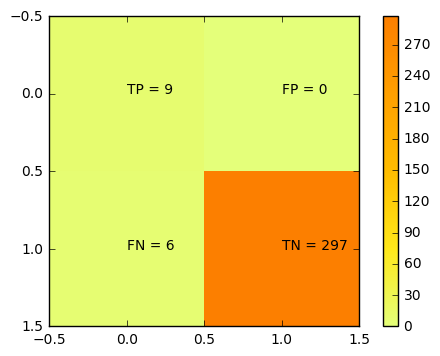

In [156]:
generate_confusion_matrix(testing_results,"ew_new_10000.npy",["EW"],["sample_1"])

mean: 76969.941595 TP: 9 TN: 262 FP: 29 FN: 7 Accuracy: 0.882736156352


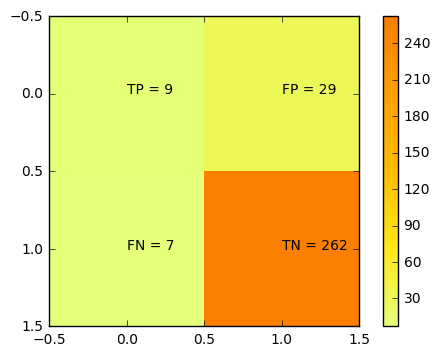

In [157]:
generate_confusion_matrix(testing_results,"kara_new_10000.npy",["Kara"],["Baseline","Close","training"])

mean: 116992.612935 TP: 4 TN: 101 FP: 190 FN: 9 Accuracy: 0.345394736842


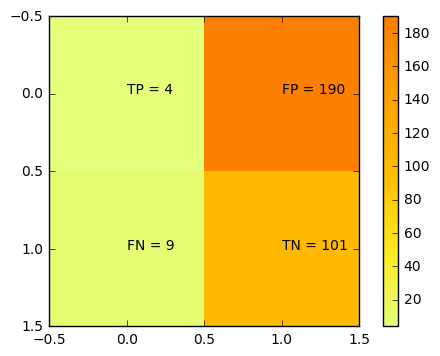

In [158]:
generate_confusion_matrix(testing_results,"cindy_new_10000.npy",["Cindy"],["Baseline","Close","training"])

mean: 75047.9095684 TP: 8 TN: 288 FP: 0 FN: 8 Accuracy: 0.973684210526


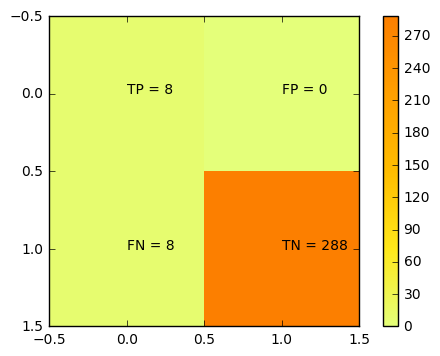

In [159]:
generate_confusion_matrix(testing_results,"samarth_new_10000.npy",["Samarth"],["soft","close","training"])

mean: 78381.3612369 TP: 12 TN: 190 FP: 90 FN: 12 Accuracy: 0.664473684211


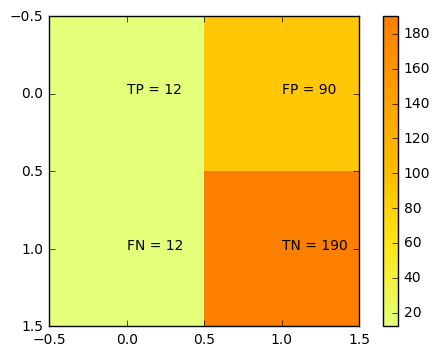

In [160]:
generate_confusion_matrix(testing_results,"jourdon_new_10000.npy",["Jourdon","jourdan"],["baseline","close","training"])

mean: 73216.6479664 TP: 10 TN: 291 FP: 0 FN: 6 Accuracy: 0.980456026059


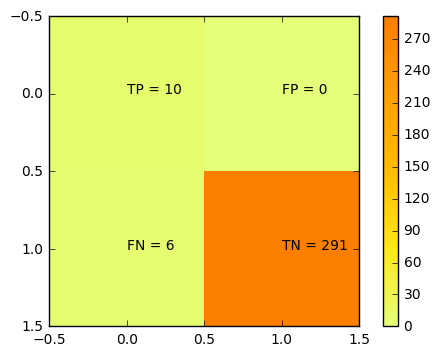

In [161]:
generate_confusion_matrix(testing_results,"arti_new_10000.npy",["AG","Arti"],["Baseline","close","training"])

mean: 73593.0159238 TP: 16 TN: 277 FP: 0 FN: 14 Accuracy: 0.954397394137


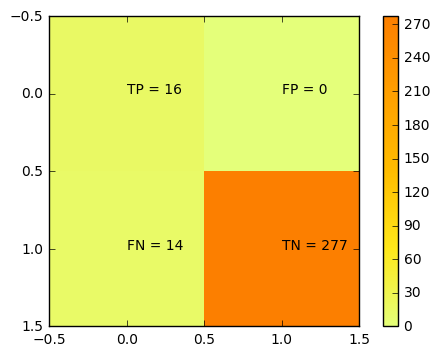

In [162]:
generate_confusion_matrix(testing_results,"anne_new_10000.npy",["Anne"],["baseline","close","training"])